# **Not an ideal network**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


#### Import all Required Packages

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

#### Load mnist dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


#### Visualise single image of the train data set

(60000, 28, 28)


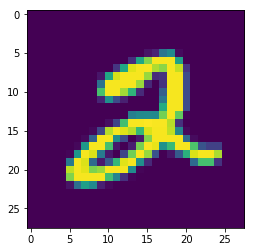

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

#### Reshape the images 28X28X1 which goes as a input image for the CNN

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Standardise the pixel values which are between 0 to 255 and resultant values are between 0 to 1

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### Target classes of corresponding images. Values are between 0 to 9

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Convert the target classes to one-hot vector of size 10 i,e. target class's positional value will become 1 and rest all positions are filled with 0

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#Receptive field becomes: 3X3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#Receptive field becomes: 5X5
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Receptive field becomes: 7X7
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Receptive field becomes: 14X14
model.add(MaxPooling2D(pool_size=(2, 2)))

#Receptive field becomes: 16X16
model.add(Convolution2D(256, 3, 3, activation='relu'))

##Receptive field becomes: 18X18
model.add(Convolution2D(512, 3, 3, activation='relu'))

##Receptive field becomes: 20X20
model.add(Convolution2D(1024, 3, 3, activation='relu'))

##Receptive field becomes: 22X22
model.add(Convolution2D(2048, 3, 3, activation='relu'))

##Receptive field becomes: 24X24
model.add(Convolution2D(10, 3, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 120s 2ms/step - loss: 2.3030 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])


[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


#### As we observe from the images..

1. The dataset has images of hand written digits. Each image has only one digit in it.

2. This problem statement is not so complex. As per my understanding very simple network with less than 15k parameters    will give more than 90% accuracy. 

3. When we observe the network architecture in current notebook we observe that in each layer we are doubling the channels. Which will add too many parameters to the network. Because of too many parameters the network will bulkier and takes lots of time to train

4. As the given images does not contain complex objects in it only some basic channels like edges,gradients are suffient but in this architecture we are adding too many channels which will cause unnecessary overload and also will confuse the network with too many channels.

5. One more important thing is we are using 3x3 kernal to reduce the number channels which is not a good practice.





#### Slight improvisation on previous network.

I just added a 1X1 kernel to reduce the number of channels followed by 3X3 convolution which shoot up the accuracy.  Still we can work on to reduce number of channels from the layers which will make the network much more faster and efficient

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#Receptive field becomes: 3X3
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

#Receptive field becomes: 5X5
model.add(Convolution2D(64, 3, 3, activation='relu'))

#Receptive field becomes: 7X7
model.add(Convolution2D(128, 3, 3, activation='relu'))

#Receptive field becomes: 14X14
model.add(MaxPooling2D(pool_size=(2, 2)))

#Receptive field becomes: 16X16
model.add(Convolution2D(256, 3, 3, activation='relu'))

##Receptive field becomes: 18X18
model.add(Convolution2D(512, 3, 3, activation='relu'))

##Receptive field becomes: 20X20
model.add(Convolution2D(1024, 3, 3, activation='relu'))

##Receptive field becomes: 22X22
model.add(Convolution2D(2048, 3, 3, activation='relu'))


model.add(Convolution2D(10, 1, activation='relu'))
##Receptive field becomes: 24X24
model.add(Convolution2D(10, 3, 3, activation='relu'))


model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update 

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2915 - acc: 0.9045
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0666 - acc: 0.9814
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0524 - acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0433 - acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0335 - acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0327 - acc: 0.9910
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0296 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0254 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0209 - acc: 0.9943
Epoch 10/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0255 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.04424734497017498, 0.9888]
